# Shared Bikes Demand Analysis Using Multiple Linear Regression

## <font color = red> Step 1 : Reading and Understanding the data </font>

#### <font color = brown>  # Import the required libraries and the Data set  </font>


In [253]:
# import the warnings

import warnings
warnings.filterwarnings('ignore')

In [254]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [255]:
# Reading the csv file

df = pd.read_csv('bike.csv')

In [256]:
# viewing sample records

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [257]:
df.shape

(730, 16)

#### <font color = brown>  Checking missing values  </font>

In [258]:
# inspecting the dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### <font color = blue> Comment : It seems there are no missing values in the dataframe </font> 

In [259]:
# inspecting the numerical columns

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## <font color = red>    Step 2 : Data Preparation (EDA) </font>

In [260]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### <font color = blue>    the 'dteday' column is object type while clearly it should be in date time format </font>
#### <font color = brown>    coverting the format </font>

In [261]:
df['dteday'] = df['dteday'].astype('datetime64')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

####  The columns 'season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit' are int type but they are categorical values 

####  As per the data dictionary the 'season', 'mnth' and 'weathersit' columns have specific levels associated with them. So we need to change them to categorical object strings 

#### <font color = brown>  # changing the 'season' column to categorical object strings  </font>

In [263]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [264]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [265]:
# creating a funtion to map the numerical values with the specific levels
# applying the function on the 'season' column of the dataframe

def cat_season(val):
    return val.map({1:'spring',2:'summer',3:'fall',4:'winter'})
df[['season']] = df[['season']].apply(cat_season)

In [266]:
# validating the change

df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

#### changing the 'mnth' column to categorical object strings

In [267]:
df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [268]:
# creating a funtion to map the numerical values with the specific levels
# applying the function on the 'mnth' column of the dataframe

def cat_mnth(val):
    return val.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df[['mnth']] = df[['mnth']].apply(cat_mnth)

In [269]:
# validating the change

df['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

#### changing the 'weathersit' column to categorical object strings

In [270]:
df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [271]:
# creating a funtion to map the numerical values with the specific levels
# applying the function on the 'weathersit' column of the dataframe

def cat_weathersit(val):
    return val.map({1:'clear',2:'mist',3:'lightRain',4:'heavyRain'})
df[['weathersit']] = df[['weathersit']].apply(cat_weathersit)

In [272]:
# validating the change

df['weathersit'].unique()

array(['mist', 'clear', 'lightRain'], dtype=object)

#### changing the 'workingday' column to categorical object strings

In [273]:
df['workingday'].unique()

array([1, 0], dtype=int64)

In [274]:
# creating a funtion to map the numerical values with the specific levels
# applying the function on the 'workingday' column of the dataframe

def cat_workingday(val):
    return val.map({0:'no',1:'yes'})
df[['workingday']] = df[['workingday']].apply(cat_workingday)

In [275]:
# validating the change

df['workingday'].unique()

array(['yes', 'no'], dtype=object)

#### changing the 'yr' column to categorical object strings

In [276]:
df['yr'].unique()

array([0, 1], dtype=int64)

In [277]:
# creating a funtion to map the numerical values with the specific levels
# applying the function on the 'yr' column of the dataframe

def cat_yr(val):
    return val.map({0:'2018',1:'2019'})
df[['yr']] = df[['yr']].apply(cat_yr)

In [278]:
# validating the change

df['yr'].unique()

array(['2018', '2019'], dtype=object)

#### changing the 'weekday' column to categorical object strings

In [279]:
df['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [280]:
# creating a funtion to map the numerical values with the specific levels
# applying the function on the 'weekday' column of the dataframe

def cat_weekday(val):
    return val.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df[['weekday']] = df[['weekday']].apply(cat_weekday)

In [281]:
# validating the change

df['weekday'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], dtype=object)

#### changing the 'holiday' column to categorical object strings

In [282]:
df['holiday'].unique()

array([0, 1], dtype=int64)

In [283]:
# creating a funtion to map the numerical values with the specific levels
# applying the function on the 'holiday' column of the dataframe

def cat_holiday(val):
    return val.map({0:'no',1:'yes'})
df[['holiday']] = df[['holiday']].apply(cat_holiday)

In [284]:
# validating the change

df['holiday'].unique()

array(['no', 'yes'], dtype=object)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

#### <font color = brown>  # Dropping unwanted columns  </font>

#### removing some variables as they may not be very useful in our model building: 

####  We can drop the 'casual' and registered' columns as 'cnt' is our target variable and is a sum of both 
####  We shall also drop 'instant' as it is an ID 
#### We can remove 'dteday' as similar information can be available from 'season'.'yr','mnth','holiday' and 'weekday' columns more meaningfuly

In [286]:
# So our relevant categorical columns will be 

df_cat = df.select_dtypes(exclude=['float64','int64','datetime64'])

In [287]:
df_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,2018,Jan,no,mon,yes,mist
1,spring,2018,Jan,no,tue,yes,mist
2,spring,2018,Jan,no,wed,yes,clear
3,spring,2018,Jan,no,thu,yes,clear
4,spring,2018,Jan,no,fri,yes,clear


In [288]:
# similarly our relevant numerical column will be

df_num = df.select_dtypes(include=["float64",'int64'])

In [289]:
df_num.head()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [290]:
df_num = df_num.drop(['casual', 'registered', 'instant'], axis =1)

In [291]:
df_num.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


## <font color = red> Step 3 Data Visualization    </font>

#### <font color = brown>  # Data Visualization for numerical columns   </font>

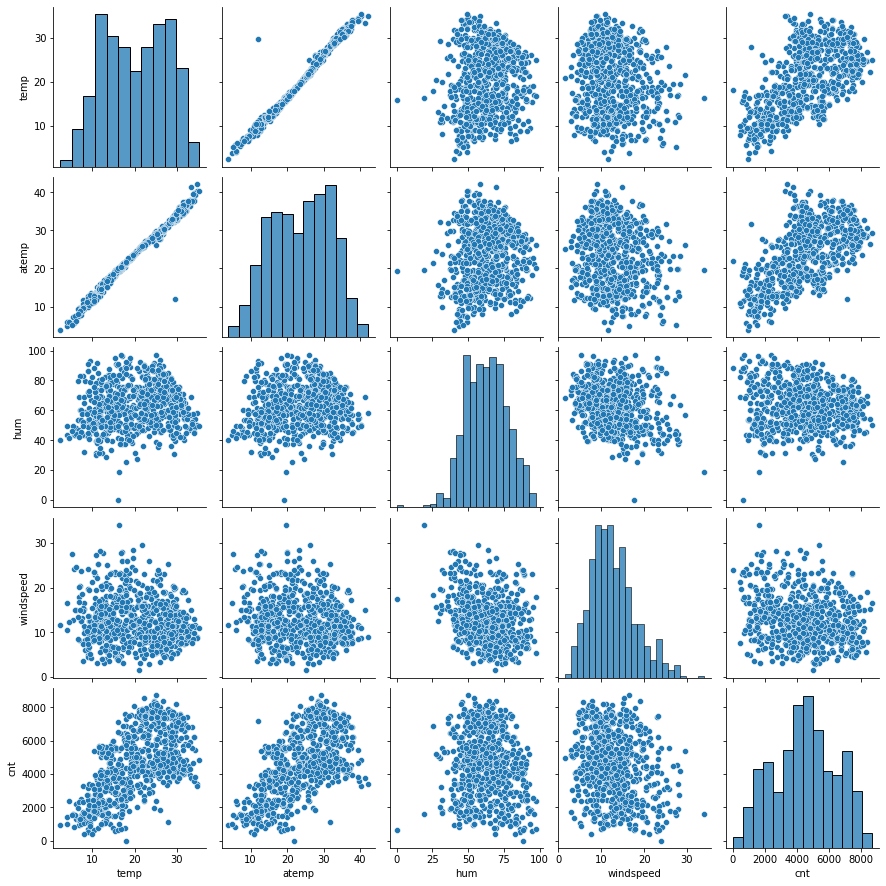

In [292]:
sns.pairplot(df_num)
plt.show()

#### We see that 'temp' and 'atemp' are highly correlated and so we can drop 'atemp' to avoid multicolinearity

In [293]:
# Correlation Matrix

cor = df_num.corr()
cor

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


#### <font color = brown>  # Dropping 'atemp' column  </font>

In [294]:
df_num = df_num.drop(['atemp'], axis =1)

In [295]:
df_num.head()

,temp,hum,windspeed,cnt
0,14.110847,80.5833,10.749882,985
1,14.902598,69.6087,16.652113,801
2,8.050924,43.7273,16.636703,1349
3,8.200000,59.0435,10.739832,1562
4,9.305237,43.6957,12.522300,1600


#### <font color = brown>  # Univariate analysis of numerical variables </font>

#### <font color = brown>  # Checking for outliers  </font>


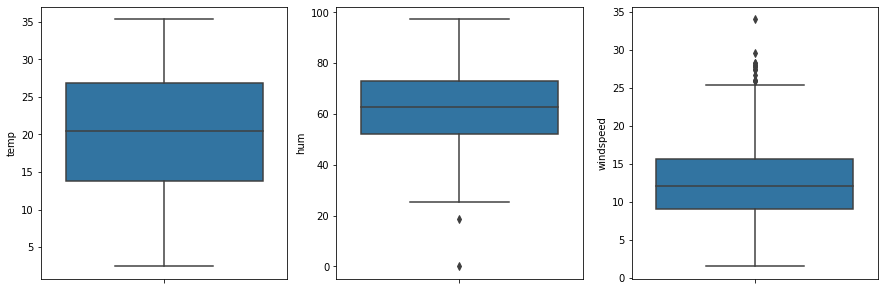

In [296]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.boxplot(y=df_num['temp'])

plt.subplot(132)
ax = sns.boxplot(y=df_num['hum'])

plt.subplot(133)
sns.boxplot(y=df_num['windspeed'])
plt.show()

#### There are no major outliers and we may leave the data untreated for now.

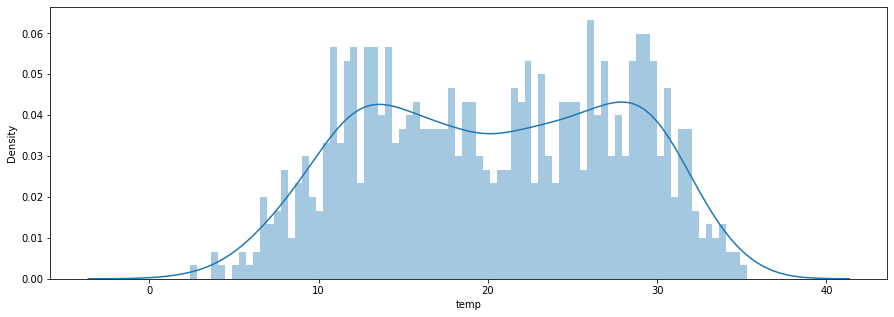

In [297]:
# histogram of temp
plt.figure(figsize=(15,5))
sns.distplot(df['temp'], bins =80)
plt.show()

#### When we plot temp vs cnt. We can see that temp increases till around 28 and then goes down .
#### So it is linear but increases linearly till around 28 and then goes down. 
#### We can therefore create a derived variable temp_derived = abs(28-temp)
#### As the problem statement also hints at creating a derived variable.

In [298]:
df_num['temp_derived'] = 28 - df_num['temp']

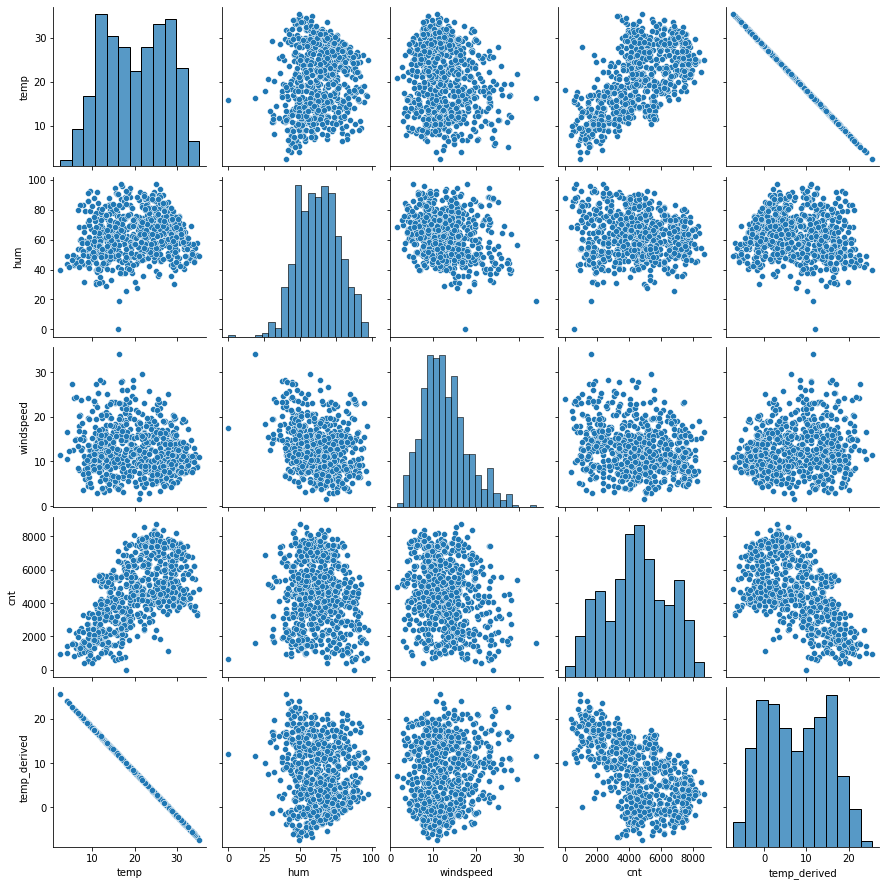

In [299]:
sns.pairplot(df_num)
plt.show()

#### We see that the temperature is now has a more linear relationship with 'cnt' with the use of 'temp_derived'
#### we can now drop the 'temp' column in lieu of 'temp_derived'

In [300]:
df_num = df_num.drop(['temp'], axis=1)

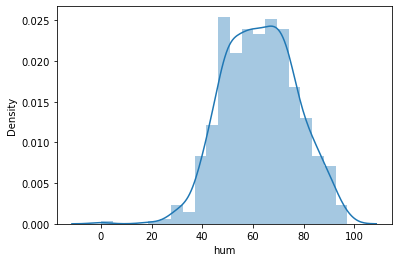

In [301]:
# histogram of humidity

sns.distplot(df['hum'])
plt.show()

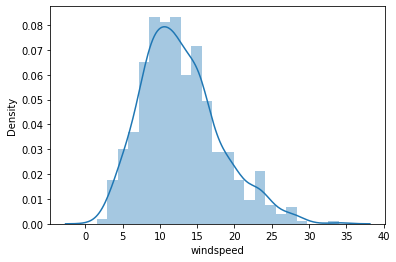

In [302]:
# histogram of windspeed

sns.distplot(df['windspeed'])
plt.show()

In [303]:
cor = df_num.corr()
cor

,hum,windspeed,cnt,temp_derived
hum,1.000000,-0.248506,-0.098543,-0.128565
windspeed,-0.248506,1.000000,-0.235132,0.158186
cnt,-0.098543,-0.235132,1.000000,-0.627044
temp_derived,-0.128565,0.158186,-0.627044,1.000000


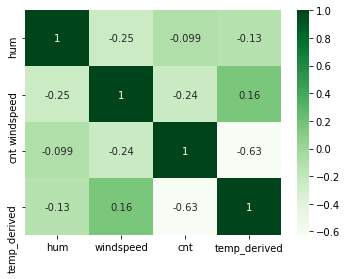

In [304]:
plt.figure(figsize=(5,4))
sns.heatmap(cor,annot=True, cmap='Greens');
plt.tight_layout()

#### It seems 'temp_derived' and 'windspeed' seems to have a good correlation value with 'cnt'

#### <font color = brown>  # Analysis of Categorical variables with target variable 'cnt' </font>


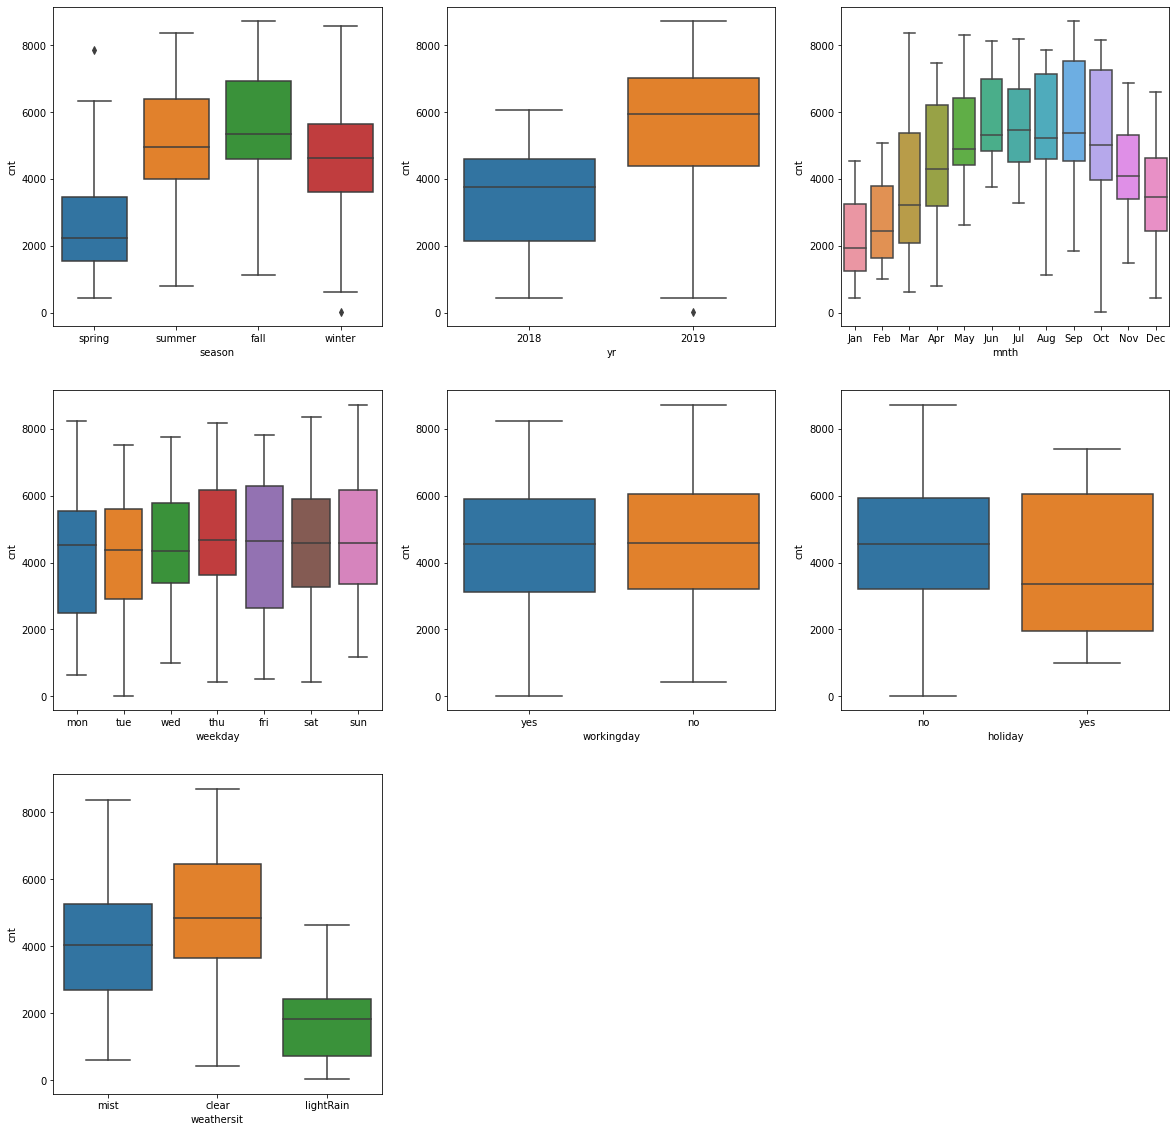

In [305]:
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(332)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(333)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(334)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(335)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(336)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(337)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

#### We see that

#### Bike sharing count is more in season of summer and Fall compared to winter and spring.
#### Bike sharing count increases in the year 2019
#### Bike sharing count is more in month of June to october.
#### Bike sharing count is comparatively higher on Friday that other days
#### Bike sharing count is more when weathersit is Clear, Few clouds, Partly cloudy, Partly cloudy.

### <font color = brown> Creating dummy variables   </font>

In [306]:
df_dummies = pd.get_dummies(df_cat, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_yes,weathersit_lightRain,weathersit_mist
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### <font color = brown>  # Joining the numerical and dummy variables to create final dataframe  </font>


In [307]:
df_new = pd.concat([df_num, df_dummies],axis=1)

In [308]:
df_new.head()

,hum,windspeed,cnt,temp_derived,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_yes,weathersit_lightRain,weathersit_mist
0,80.5833,10.749882,985,13.889153,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,69.6087,16.652113,801,13.097402,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,43.7273,16.636703,1349,19.949076,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,59.0435,10.739832,1562,19.800000,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,43.6957,12.522300,1600,18.694763,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## <font color = red> Step 4: Spiltting the final dataframe into Train and Test sets   </font>


In [309]:
X = df_new.drop('cnt',axis=1)
y = df_new['cnt']

In [310]:
X.shape

(730, 28)

In [311]:
y.shape

(730,)

In [312]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [313]:
X_train.head()

,hum,windspeed,temp_derived,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_yes,weathersit_lightRain,weathersit_mist
704,50.8750,11.708518,17.510847,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
565,84.4167,14.000789,0.700847,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
185,59.0417,8.459286,-2.613347,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
269,88.5417,7.917457,1.896653,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
178,63.4167,9.666961,-2.510847,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## <font color = red> Step 5: Scaling of numerical features   </font>

In [314]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [315]:
var = ['temp_derived','hum','windspeed']
X_train[var] = scaler.fit_transform(X_train[var])

In [316]:
X_train.head()

,hum,windspeed,temp_derived,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_yes,weathersit_lightRain,weathersit_mist
704,0.523136,0.314103,0.754899,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
565,0.868038,0.384635,0.244019,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
185,0.607113,0.214126,0.143296,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
269,0.910454,0.197454,0.280361,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
178,0.652100,0.251285,0.146411,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [317]:
X_train.describe()

,hum,windspeed,temp_derived,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_yes,weathersit_lightRain,weathersit_mist
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.639471,0.345503,0.464419,0.258562,0.255137,0.243151,0.510274,0.078767,0.090753,0.080479,...,0.032534,0.136986,0.130137,0.145548,0.145548,0.145548,0.142123,0.695205,0.030822,0.325342
std,0.145789,0.156924,0.228455,0.438220,0.436312,0.429353,0.500323,0.269606,0.287504,0.272267,...,0.177566,0.344128,0.336743,0.352955,0.352955,0.352955,0.349476,0.460715,0.172983,0.468904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.526992,0.233344,0.264526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.639246,0.326928,0.459481,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.744430,0.433327,0.664300,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### After scaling all the values are between 0 and 1.

## <font color = red> Step 6: Building a Linear Model & Making predictions   </font>


#### <font color = brown>  # Performing Linear Regtession  </font>


In [318]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### <font color = brown>  # Coefficients calculation  </font>


In [319]:
print(lm.coef_)

[-1381.38331668 -1319.28853888 -3667.70817799  -912.49487819
   116.27963512   803.75322665  2020.23327656    46.7135944
  -452.43870819   -85.2005177   -257.45004343  -173.12188842
   143.95424349   321.85594231   304.93569778  -532.71386714
   173.76046079   668.81597659  -162.10537526  -260.71009544
   317.2200839    430.57619378   -66.68612034  -327.46907306
   -90.46408242   411.91067009 -1826.12106732  -418.43159434]


In [320]:
print(lm.intercept_)

6429.943595612871


In [321]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
hum,-1381.383317
windspeed,-1319.288539
temp_derived,-3667.708178
season_spring,-912.494878
season_summer,116.279635
season_winter,803.753227
yr_2019,2020.233277
mnth_Aug,46.713594
mnth_Dec,-452.438708
mnth_Feb,-85.200518


In [322]:
X_test.columns

Index(['hum', 'windspeed', 'temp_derived', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_yes', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'workingday_yes', 'weathersit_lightRain', 'weathersit_mist'],
      dtype='object')

In [323]:
X_train.columns

Index(['hum', 'windspeed', 'temp_derived', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_yes', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'workingday_yes', 'weathersit_lightRain', 'weathersit_mist'],
      dtype='object')

In [324]:
X_test[var] = scaler.transform(X_test[var])

#### <font color = brown>  # Making Predictions  </font>


In [325]:
# Making Predictions

y_pred = lm.predict(X_test)

#### <font color = brown>  # Evaluating the Model   </font>


Text(0, 0.5, 'y_pred')

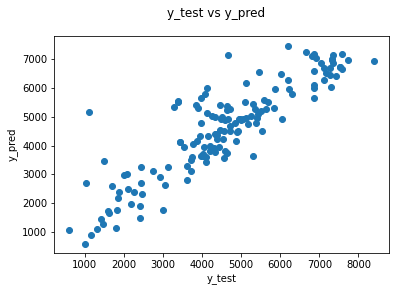

In [326]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred')              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred')                          # Y-label

In [327]:
# Plotting y_test and y_pred to understand the spread.
spread = y_test-y_pred
size = spread.shape
size

(146,)

Text(0.5, 0.98, 'Actual and Predicted')

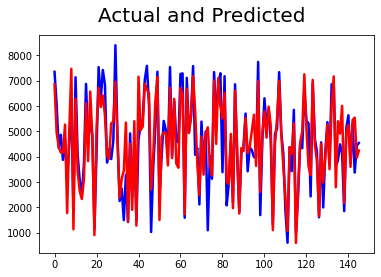

In [328]:
c = [i for i in range(146)] 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") 
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-") 
fig.suptitle('Actual and Predicted', fontsize=20)

Text(0, 0.5, 'ytest-ypred')

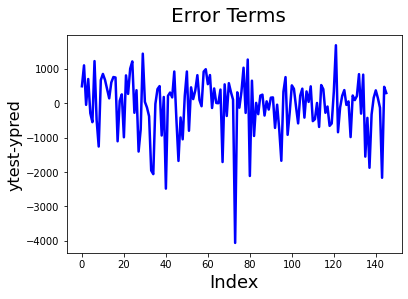

In [329]:
c = [i for i in range(146)]

fig = plt.figure() 
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-") 
fig.suptitle('Error Terms', fontsize=20) 
plt.xlabel('Index', fontsize=18) 
plt.ylabel('ytest-ypred', fontsize=16)

In [330]:
# Checking Error Terms

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 605.1726176740115
Mean Squared Error: 704390.8695932076
Root Mean Squared Error: 839.2799709234146


In [331]:
yhat = lm.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8579986810192555 0.8508346505121188


In [332]:
yhat = lm.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.7782224136888092 0.7251474357681824


#### <font color = red>  # R2 Score  </font>

In [333]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7782224136888092

#### <font color = brown>  # Running RFE   </font>


In [334]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [335]:

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [336]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('hum', True, 1),
 ('windspeed', True, 1),
 ('temp_derived', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 10),
 ('mnth_Jan', False, 5),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 2),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('holiday_yes', False, 9),
 ('weekday_mon', False, 6),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 4),
 ('weekday_wed', False, 12),
 ('workingday_yes', True, 1),
 ('weathersit_lightRain', True, 1),
 ('weathersit_mist', True, 1)]

In [337]:
## selecting features as per rfe
col = X_train.columns[rfe.support_]
col

Index(['hum', 'windspeed', 'temp_derived', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_sat', 'weekday_sun', 'workingday_yes', 'weathersit_lightRain',
       'weathersit_mist'],
      dtype='object')

In [338]:
## importing statsmodel and adding constant to train the linear model

import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train[col])
lm = sm.OLS(y_train,X_train_rfe).fit()

In [339]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     214.2
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          2.73e-222
Time:                        21:08:27   Log-Likelihood:                -4705.5
No. Observations:                 584   AIC:                             9443.
Df Residuals:                     568   BIC:                             9513.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6404.5906 

#### <font color = brown>  # Calculate the VIFs for the new model   </font>


In [340]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,100.37
13,workingday_yes,7.66
12,weekday_sun,5.17
11,weekday_sat,4.81
3,temp_derived,3.29
4,season_spring,2.76
5,season_winter,2.27
1,hum,1.98
9,mnth_Nov,1.63
15,weathersit_mist,1.57


In [341]:
# Creating custom functions for repeated use in RFE

def build_model(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit() 
    print(lm.summary()) 
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Dropping 'workingday_yes' variables as it has a high VIF

In [342]:
# Dropping 'workingday_yes' and training the model again

X_train_1 = X_train_rfe.drop(["workingday_yes"], axis =1)

X_train_1 = build_model(X_train_1,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     225.5
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          1.84e-221
Time:                        21:08:28   Log-Likelihood:                -4710.3
No. Observations:                 584   AIC:                             9451.
Df Residuals:                     569   BIC:                             9516.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6976.3095 

In [343]:
checkVIF(X_train_1)

,Features,VIF
0,const,66.48
3,temp_derived,3.29
4,season_spring,2.75
5,season_winter,2.27
1,hum,1.98
9,mnth_Nov,1.62
14,weathersit_mist,1.57
7,mnth_Dec,1.37
13,weathersit_lightRain,1.34
8,mnth_Jul,1.30


#### Dropping 'weekday_sat' variable as its p-value is 0.435 which is high

In [344]:
# Dropping 'weekday_sat' and training the model again

X_train_2 = X_train_1.drop(["weekday_sat"], axis =1)

X_train_2 = build_model(X_train_2,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     243.0
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          1.57e-222
Time:                        21:08:28   Log-Likelihood:                -4710.6
No. Observations:                 584   AIC:                             9449.
Df Residuals:                     570   BIC:                             9510.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7008.8048 

In [345]:
checkVIF(X_train_2)

,Features,VIF
0,const,64.82
3,temp_derived,3.28
4,season_spring,2.74
5,season_winter,2.27
1,hum,1.96
9,mnth_Nov,1.62
13,weathersit_mist,1.56
7,mnth_Dec,1.36
12,weathersit_lightRain,1.33
8,mnth_Jul,1.30


#### Dropping 'weekday_sun' variable as its p-value is 0.045 which is high

In [346]:
# Dropping 'weekday_sun' and training the model again

X_train_3 = X_train_2.drop(["weekday_sun"], axis =1)

X_train_3 = build_model(X_train_3,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     261.5
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          7.08e-223
Time:                        21:08:28   Log-Likelihood:                -4712.7
No. Observations:                 584   AIC:                             9451.
Df Residuals:                     571   BIC:                             9508.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7046.3116 

In [347]:
checkVIF(X_train_3)

,Features,VIF
0,const,64.49
3,temp_derived,3.28
4,season_spring,2.74
5,season_winter,2.27
1,hum,1.95
9,mnth_Nov,1.62
12,weathersit_mist,1.55
7,mnth_Dec,1.36
11,weathersit_lightRain,1.33
8,mnth_Jul,1.29


In [348]:
X_train_4 = X_train_3
X_train_4.drop(["const"], axis =1, inplace=True)

In [349]:
checkVIF(X_train_4)

,Features,VIF
2,temp_derived,13.23
0,hum,9.63
1,windspeed,5.27
3,season_spring,3.60
4,season_winter,2.97
5,yr_2019,1.96
11,weathersit_mist,1.87
8,mnth_Nov,1.75
6,mnth_Dec,1.47
7,mnth_Jul,1.29


#### The current model seems good as all the p-values are small and the VIFs are also small values

#### <font color = brown>  # Residual Analysis - Distribution of Errors  </font>


In [350]:
lm = sm.OLS(y_train,X_train_4).fit()
y_train_cnt = lm.predict(X_train_4)

In [351]:
y_train_cnt

704    5172.760393
565    7323.869544
185    4437.518395
269    5191.112032
178    4188.381419
          ...     
98     3901.268429
322    2900.031771
382    4529.760782
365    5259.474463
510    7463.334116
Length: 584, dtype: float64

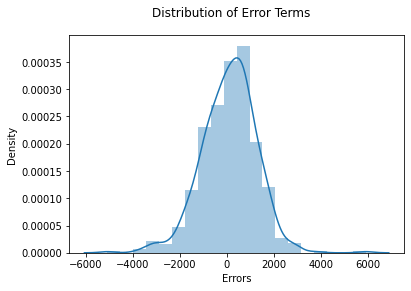

In [352]:
fig = plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)
fig.suptitle('Distribution of Error Terms')
plt.xlabel('Errors')
plt.show()

#### The error values are normally distributed as per the assumption of Linear Regression